In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics 

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib
import sklearn

# Print versions of the libraries
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", sklearn.__version__)


Pandas version: 2.2.3
Numpy version: 1.26.4
Matplotlib version: 3.7.1
Seaborn version: 0.13.0
Scikit-learn version: 1.2.2


In [3]:
df = pd.read_csv("Customer Data.csv")
df.head(4)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12


EDA: Exploratory Data Analysis

In [4]:
df.shape

(8950, 18)

In [5]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [6]:
# df.info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
# df.isnull()

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
# Filling mean values in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [12]:
# df.isnull().sum()

In [13]:
# Checking for the duplicates values in the rows
df.duplicated().sum()

0

In [14]:
#  Droping CUST_ID column as it is not of use
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [15]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
df.shape

(8950, 17)

In [17]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [18]:
# # Plotting KDE(Kernal Density Estimation Plot)
# plt.figure(figsize=(30,45))
# for i, col in enumerate(df.columns):
#     if df[col].dtype!='object':
#         ax = plt.subplot(9,2,i+1)
#         sns.kdeplot(df[col],ax=ax)
#         plt.xlabel(col)
        
# plt.show()

In [19]:
# plt.figure(figsize=(10,50))
# for i in range(0,17):
#     plt.subplot(17,1,i+1)
#     sns.distplot(df[df.columns[i]],kde_kws={'color' :'b', 'bw': 0.1, 'lw': 3, 'label': 'KDE'},hist_kws={'color':'g'})
#     plt.title(df.columns[i])
# plt.tight_layout()

#  Dist plot is a combination of kde plot and histogram

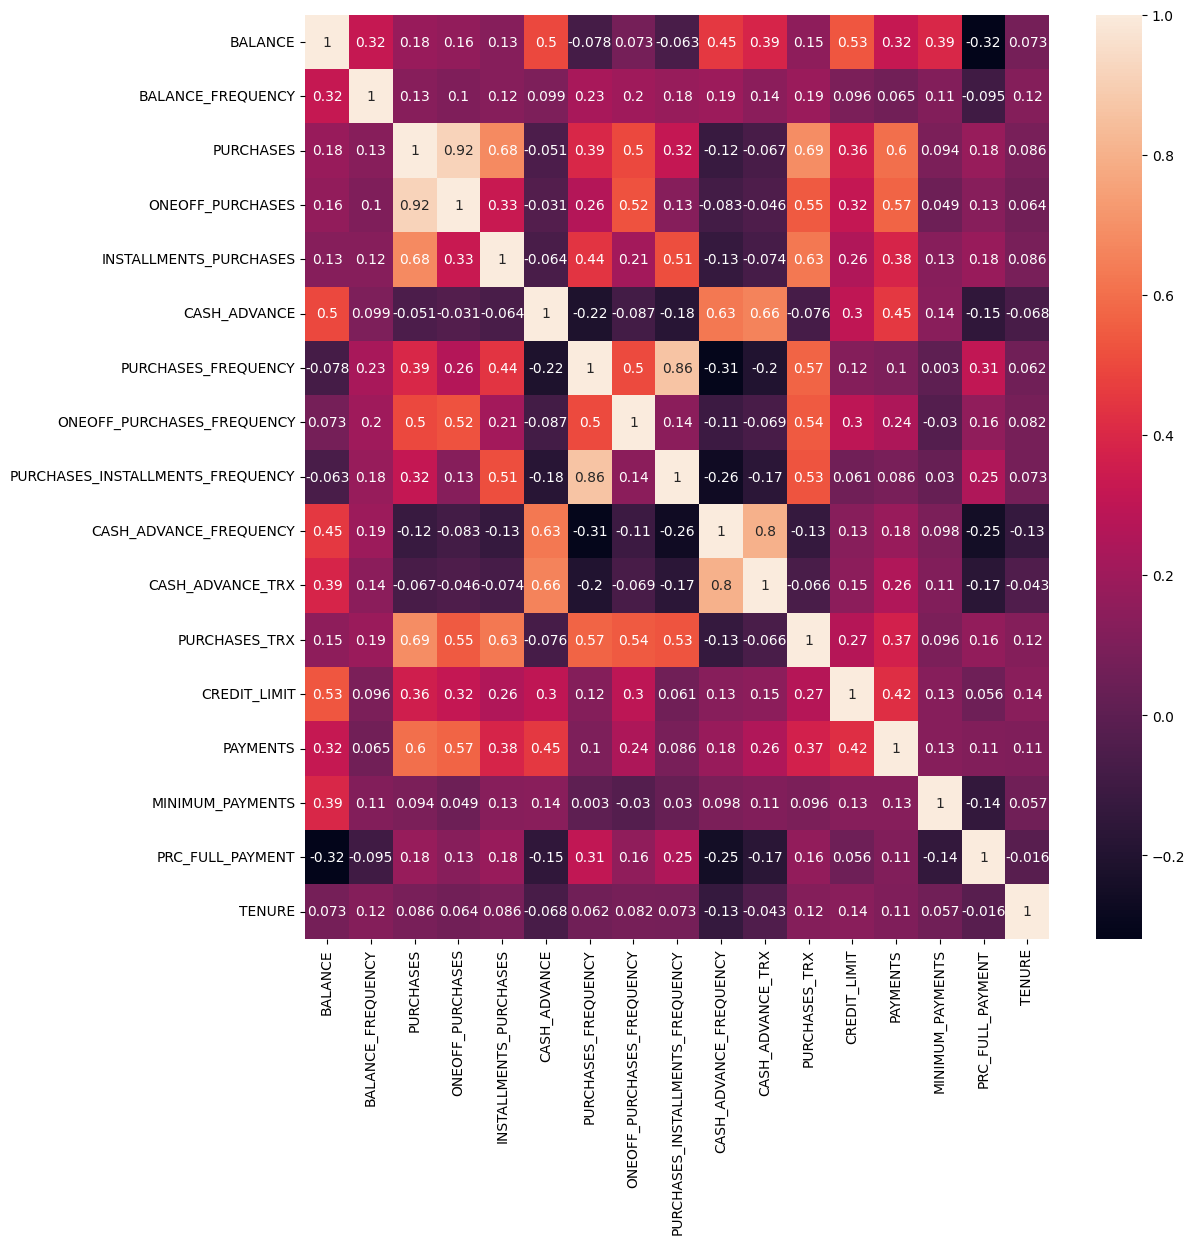

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

<!-- Scalling the DataFrame -->

# Scaling the DataFrame

# Feature Sacling: In ML we always have to scale down because if the columns have multiple values like age has 2 digits and salary has 5 digit values if we pass these without scaling then our ML Model can be biased.  

In [21]:
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)

In [22]:
scaled_df[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [23]:
scaled_df[16]

array([ 0.24387226, -0.00958554, -0.46955188, -0.35693402, -0.45457623,
        0.86092674, -1.22175806, -0.67866081, -0.91699519,  0.57396272,
       -0.03646207, -0.59179588, -0.41074255, -0.46328659, -0.20924082,
       -0.52555097, -2.6282852 ])

# Dimensionality Reduction
# Converting the DataFrame into 2D DataFrme for Visualiozation

In [24]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682213,-1.076421
1,-1.138271,2.506583
2,0.969742,-0.383298
3,-0.873662,0.043039
4,-1.599416,-0.688512
...,...,...
8945,-0.359617,-2.016102
8946,-0.564335,-1.638996
8947,-0.926191,-1.810738
8948,-2.336543,-0.657936


# Hyperparameter Tunning : Finding K with elbow Method


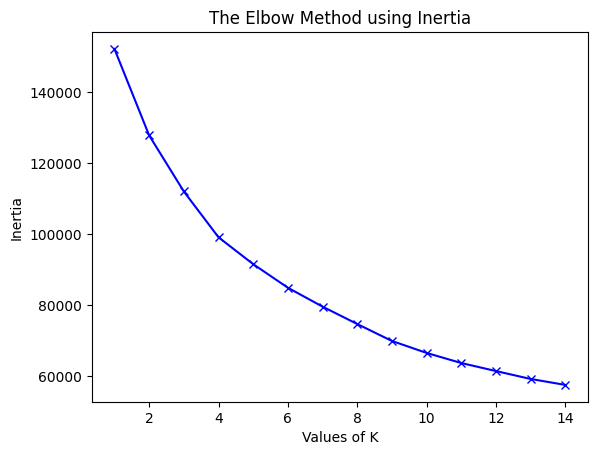

In [25]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)

plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()  

# Model Building using KMeans

In [71]:
scaled_df.shape

(8950, 17)

In [69]:
df.shape

(8950, 17)

In [72]:
pca_df_kmeans.shape

(8950, 3)

In [26]:
kmeans_model = KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [27]:
# kmeans_model.predict(scaled_df[0])

In [64]:
pca_df_kmeans

,PCA1,PCA2,cluster
0,-1.682213,-1.076421,1
1,-1.138271,2.506583,3
2,0.969742,-0.383298,0
3,-0.873662,0.043039,1
4,-1.599416,-0.688512,1
...,...,...,...
8945,-0.359617,-2.016102,0
8946,-0.564335,-1.638996,0
8947,-0.926191,-1.810738,0
8948,-2.336543,-0.657936,1


# Visualizing the clustered DataFrame

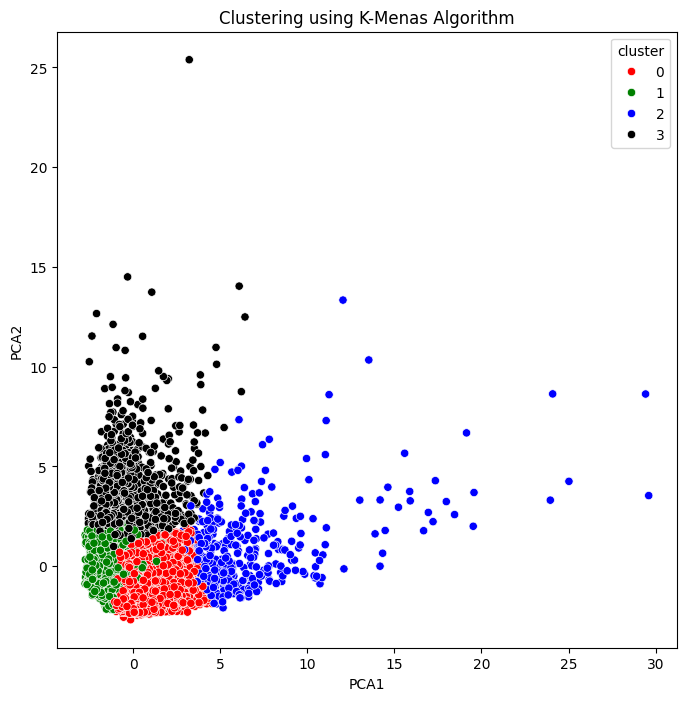

In [28]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Menas Algorithm")
plt.show()

# Find all centers of clusters 

In [29]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_ ,columns=[df.columns])
# inverse transform the data 
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])

In [30]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312


# Creating a target column "Cluster" for storing the cluster segment

In [31]:
cluster_df=pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [32]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.0,773.17,773.17,0.00,0.0,1.000000,1.0,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.0,12,0
5,1809.828751,1.0,1333.28,0.00,1333.28,0.0,0.666667,0.0,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.0,12,0


In [33]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,1
3,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.0,12,1


In [34]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.0,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,2
21,6369.531318,1.0,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,2
57,2386.330629,1.0,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,2
84,1935.362486,1.0,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,2
90,9381.255094,1.0,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,2


In [35]:
cluster_4_df = cluster_df[cluster_df["Cluster"]==3]
cluster_4_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,3
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,3
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,3
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,3


# Visualization

<Axes: xlabel='Cluster', ylabel='count'>

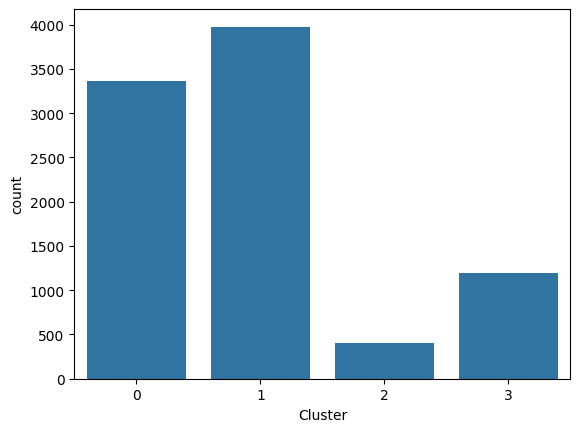

In [36]:
sns.countplot(x='Cluster',data=cluster_df)

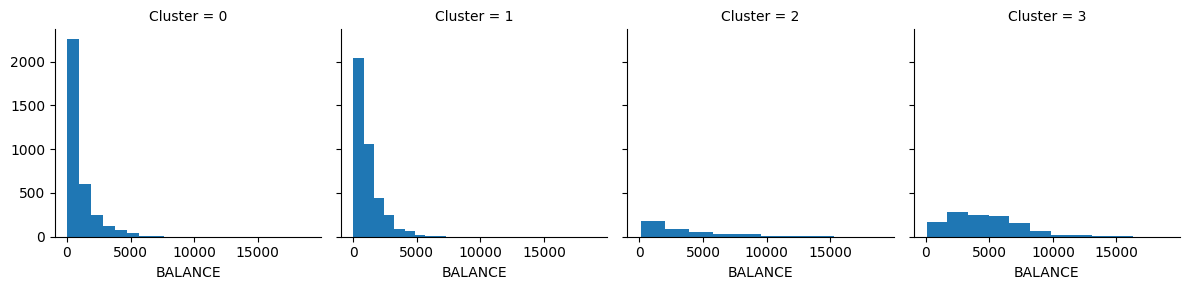

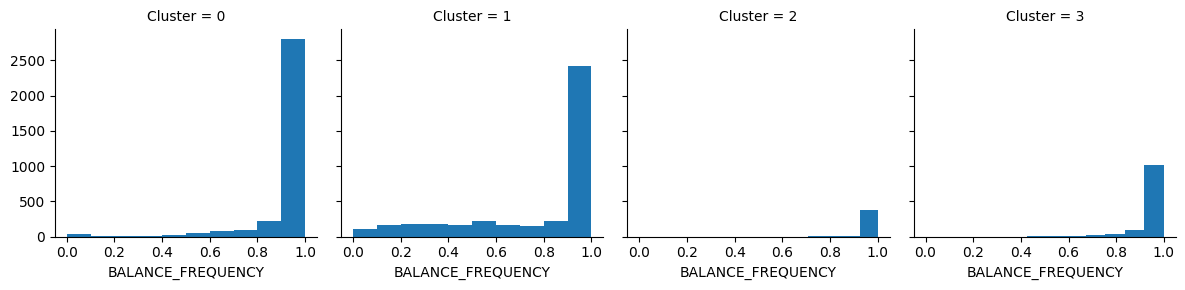

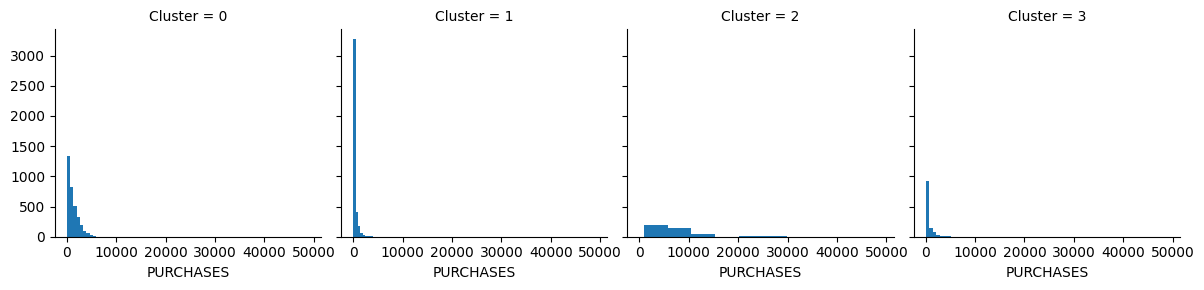

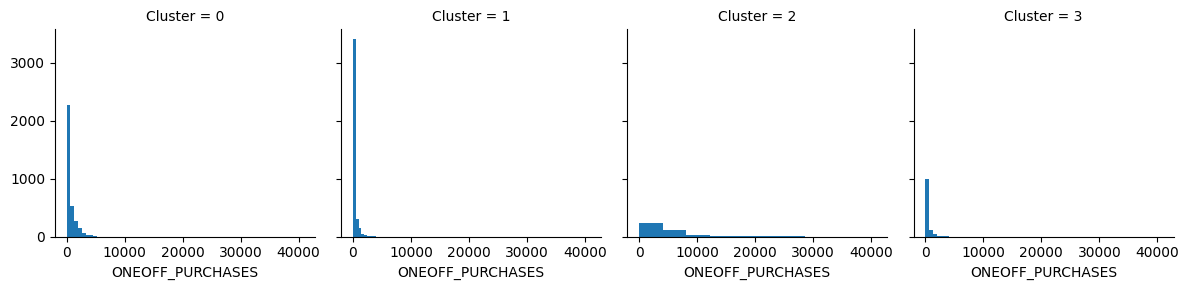

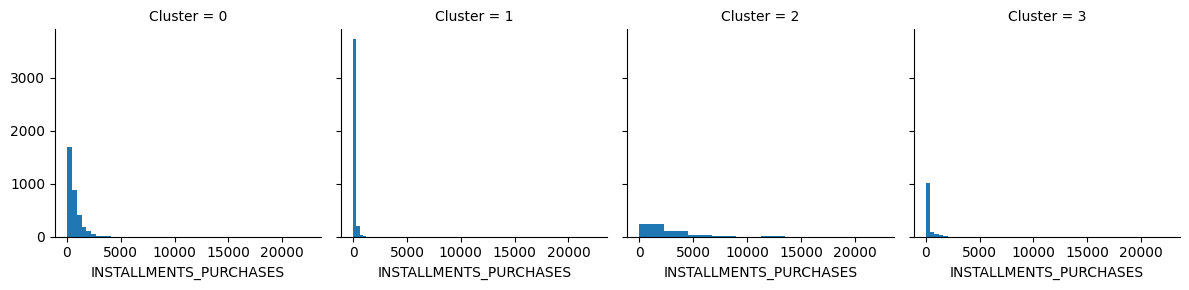

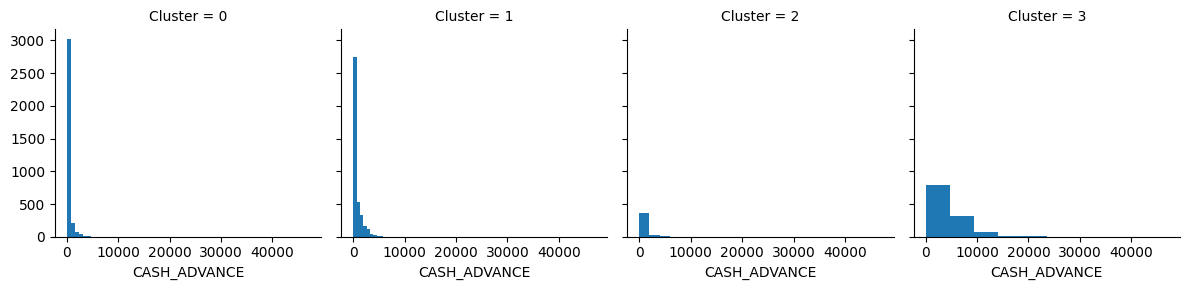

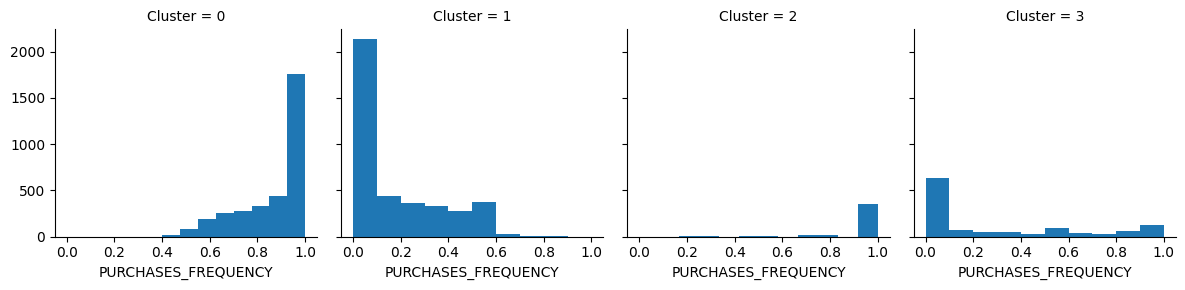

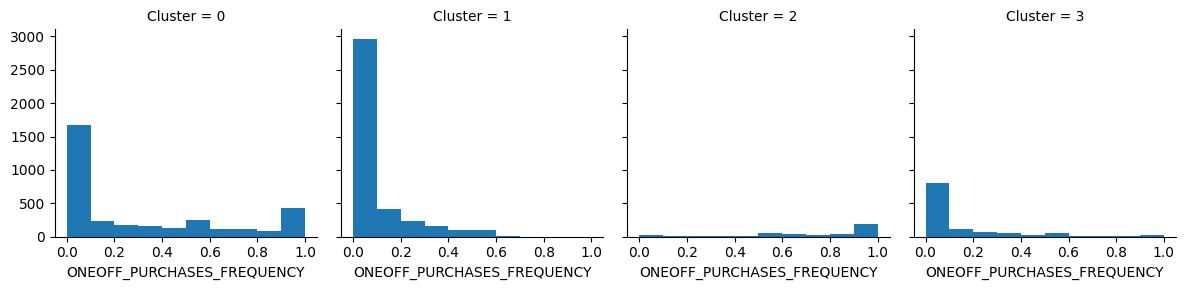

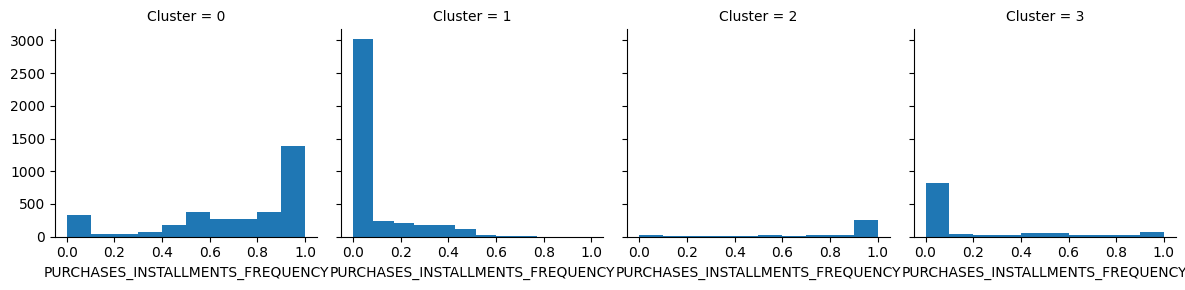

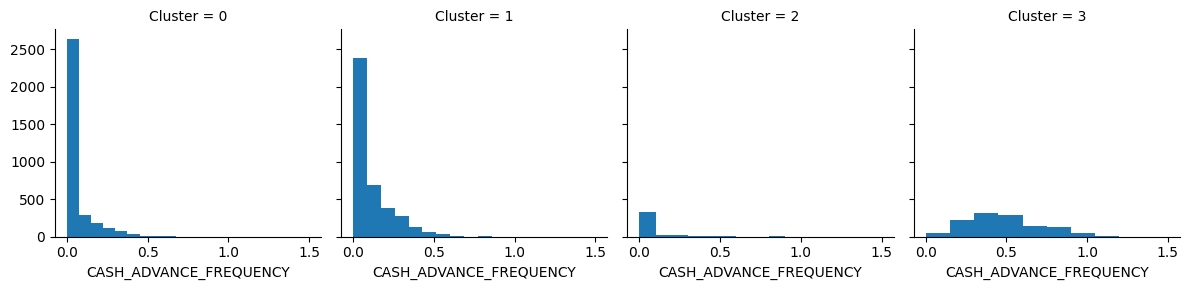

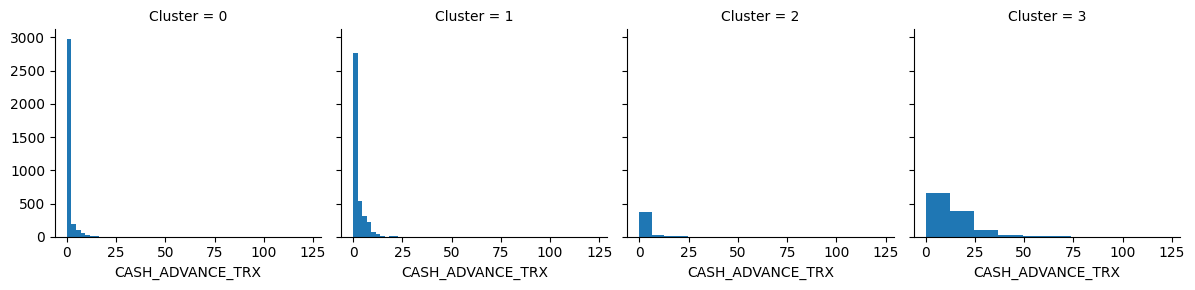

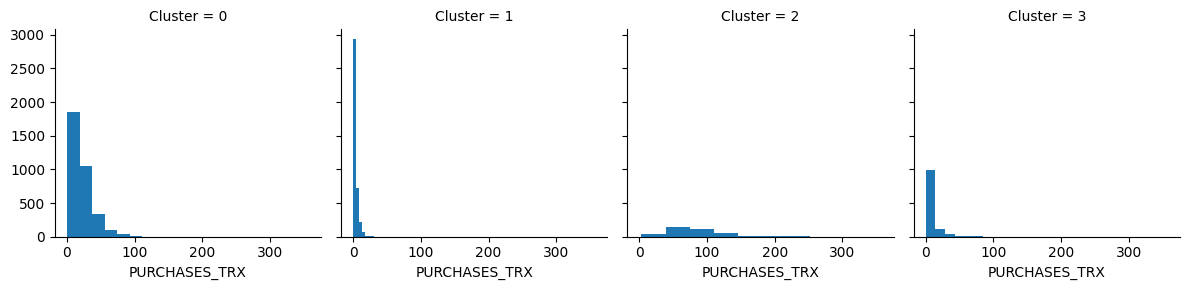

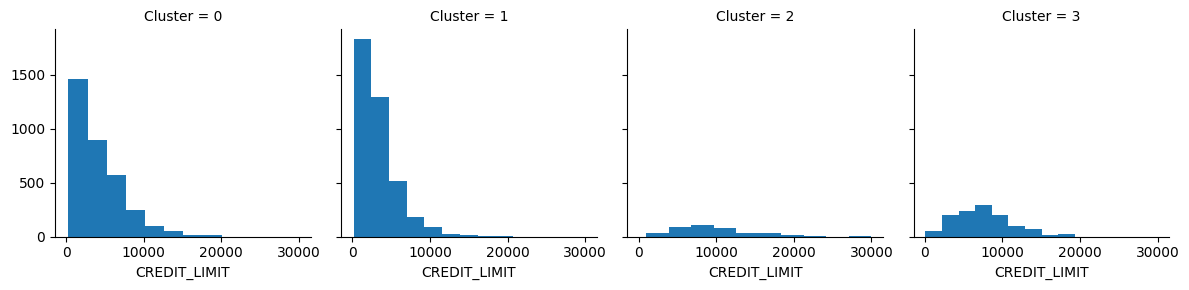

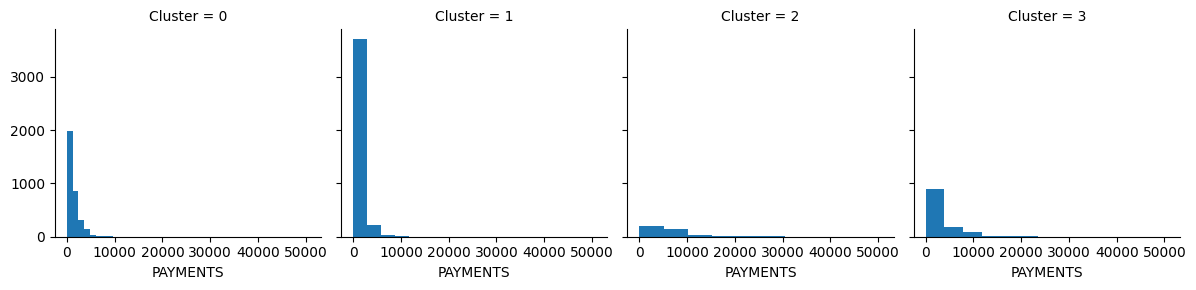

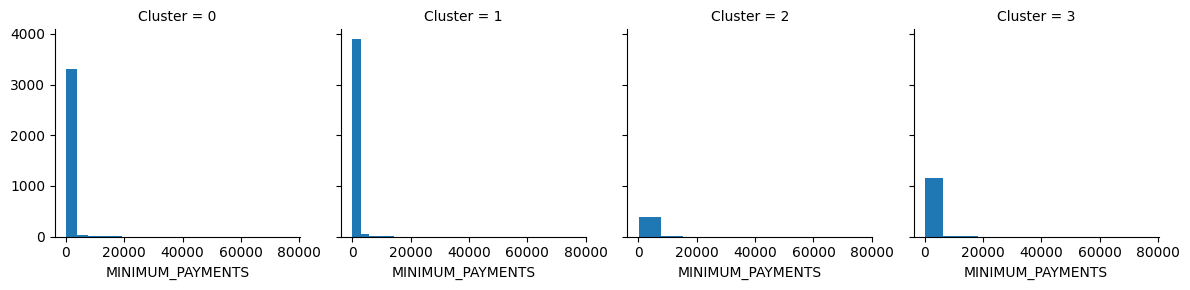

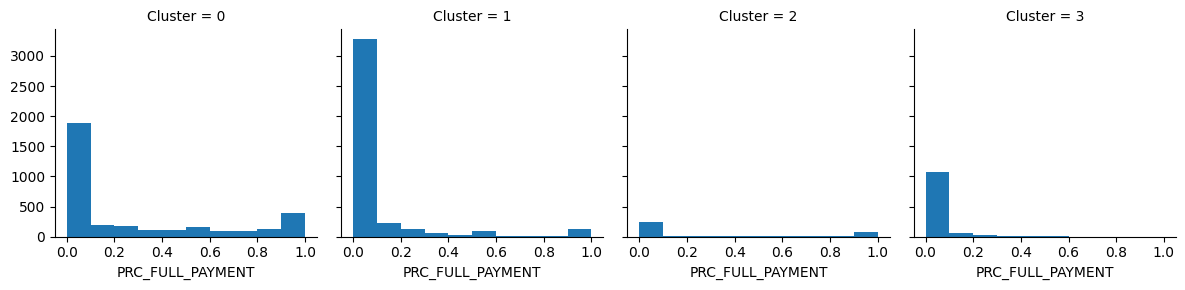

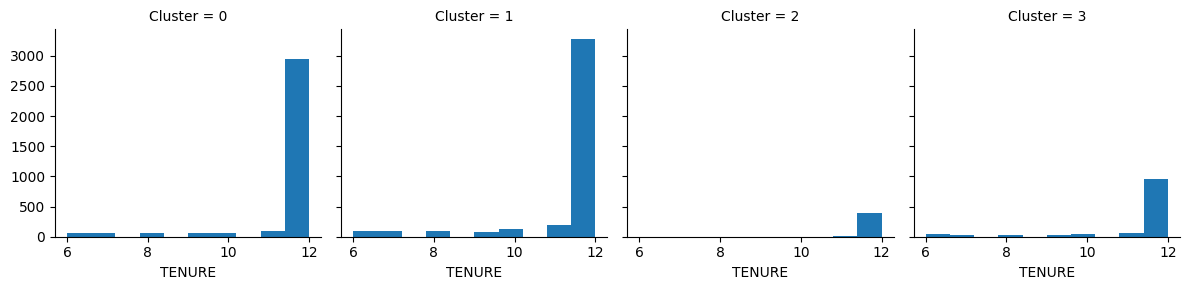

In [37]:
for c in cluster_df.drop(['Cluster'],axis=1):
     grid = sns.FacetGrid(cluster_df,col='Cluster')
     grid = grid.map(plt.hist,c)
plt.show()    

# Saving the Kmeans clustering model and data with cluster label

In [38]:
# saving Scikitlearn model
import joblib
joblib.dump(kmeans_model,"kmeans_model.pkl")

['kmeans_model.pkl']

In [39]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

# Training and Testing the model accuracy using Decision Tree

In [40]:
# Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y = cluster_df[['Cluster']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [79]:
X_train.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6725,2.611795,0.142857,43.08,43.08,0.0,0.0,0.142857,0.142857,0.0,0.0,0,2,300.0,143.823981,48.679152,0.000000,7
543,76.935610,0.833333,277.00,277.00,0.0,0.0,0.333333,0.333333,0.0,0.0,0,2,8500.0,814.605178,109.433095,0.333333,6


In [42]:
y_train

,Cluster
6725,1
543,1
4859,0
2778,0
2469,3
...,...
3633,2
5654,0
6996,1
4292,1


In [43]:
# Decision Tree
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [44]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [62]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Decision Tree model: {accuracy * 100}%")

Accuracy of the Decision Tree model: 94.04096834264432%


In [45]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 941   25    9   17]
 [  27 1158    2   23]
 [  13    1   99    3]
 [  14   23    3  327]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       992
           1       0.96      0.96      0.96      1210
           2       0.88      0.85      0.86       116
           3       0.88      0.89      0.89       367

    accuracy                           0.94      2685
   macro avg       0.92      0.91      0.91      2685
weighted avg       0.94      0.94      0.94      2685



# Saving the Decision Tree

In [46]:
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later..

# load the model from dist
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test,y_test)
print(result,'% Accuracy')

0.9404096834264432 % Accuracy


In [47]:
# To get a statistical summary of the DataFrame
cluster_4_df.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.0
mean,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312,3.0
std,2754.575494,0.091212,862.938799,666.283102,416.133434,3622.443388,0.354104,0.228871,0.311182,0.228421,12.299926,14.043625,3744.186712,4210.279433,3888.093906,0.103212,1.471048,0.0
min,78.114579,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000,3.0
25%,2480.135387,1.000000,0.000000,0.000000,0.000000,2321.162031,0.000000,0.000000,0.000000,0.333333,7.000000,0.000000,5000.000000,1214.469989,752.614680,0.000000,12.000000,3.0
50%,4275.708869,1.000000,85.730000,0.000000,0.000000,3653.331329,0.083333,0.000000,0.000000,0.500000,11.500000,1.000000,7000.000000,1963.135909,1309.935203,0.000000,12.000000,3.0
75%,6239.276755,1.000000,654.852500,330.352500,144.625000,5592.000447,0.571429,0.166667,0.333333,0.666667,17.000000,10.000000,10000.000000,4021.265959,2043.939591,0.000000,12.000000,3.0
max,16304.889250,1.000000,7194.530000,6678.260000,4059.930000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,142.000000,21500.000000,39048.597620,61031.618600,1.000000,12.000000,3.0


In [48]:
# To get a statistical summary of the DataFrame
cluster_3_df.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.0
mean,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100,2.0
std,3344.579386,0.059070,5978.185287,5377.597586,2727.924691,1872.977038,0.134578,0.289475,0.313123,0.153532,6.084375,56.419780,4824.345602,6875.811470,5069.201346,0.392138,0.451093,0.0
min,137.636267,0.272727,900.870000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,1000.000000,0.000000,108.937025,0.000000,6.000000,2.0
25%,881.358988,1.000000,4569.650000,2265.110000,835.800000,0.000000,1.000000,0.583333,0.666667,0.000000,0.000000,52.000000,6000.000000,3597.677582,249.009390,0.000000,12.000000,2.0
50%,2492.726282,1.000000,5848.550000,3705.130000,1827.960000,0.000000,1.000000,0.833333,1.000000,0.000000,0.000000,79.000000,9000.000000,5446.940305,726.696049,0.000000,12.000000,2.0
75%,5193.415429,1.000000,8533.540000,6206.990000,3176.000000,283.476295,1.000000,1.000000,1.000000,0.083333,1.000000,110.000000,12000.000000,8337.882098,1912.298544,0.666667,12.000000,2.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,62.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,2.0


In [49]:
# To get a statistical summary of the DataFrame
cluster_2_df.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.0
mean,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429,1.0
std,1097.368627,0.295184,467.629965,448.020861,155.198248,918.845971,0.188211,0.135703,0.148779,0.136996,2.963950,3.935739,2654.908975,1578.553518,1314.377150,0.205789,1.416399,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000,1.0
25%,82.249034,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,268.254041,160.857255,0.000000,12.000000,1.0
50%,763.684601,1.000000,79.100000,0.000000,0.000000,116.886449,0.083333,0.000000,0.000000,0.083333,1.000000,1.000000,2500.000000,534.729290,310.336181,0.000000,12.000000,1.0
75%,1505.001170,1.000000,339.767500,211.877500,51.207500,934.970675,0.333333,0.100000,0.083333,0.166667,3.000000,5.000000,4000.000000,1072.484778,657.149667,0.000000,12.000000,1.0
max,8115.039014,1.000000,4900.000000,4900.000000,3000.000000,6523.780195,1.000000,1.000000,0.857143,0.857143,23.000000,43.000000,23000.000000,29272.486070,28483.254830,1.000000,12.000000,1.0


In [50]:
# To get a statistical summary of the DataFrame
cluster_1_df.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.0
mean,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595,0.0
std,1212.134419,0.161833,1041.149669,872.592208,623.932335,602.337305,0.150874,0.353245,0.313701,0.099497,2.029238,15.954692,3261.269960,1275.813034,1776.698287,0.357381,1.248127,0.0
min,0.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.019163,0.000000,6.000000,0.0
25%,80.529535,1.000000,439.960000,0.000000,223.255000,0.000000,0.800000,0.000000,0.545455,0.000000,0.000000,12.000000,1500.000000,456.587019,161.279143,0.000000,12.000000,0.0
50%,337.269567,1.000000,892.300000,168.540000,450.670000,0.000000,1.000000,0.111111,0.833333,0.000000,0.000000,16.000000,3000.000000,938.788924,196.720403,0.083333,12.000000,0.0
75%,1256.639648,1.000000,1772.165000,903.000000,874.375000,0.000000,1.000000,0.583333,1.000000,0.000000,0.000000,28.000000,6000.000000,1778.813262,606.819688,0.500000,12.000000,0.0
max,9502.256762,1.000000,6520.000000,6520.000000,4538.840000,7894.578816,1.000000,1.000000,1.000000,0.750000,23.000000,186.000000,25000.000000,12020.180090,38512.124770,1.000000,12.000000,0.0


In [51]:
# Assuming `new_data` is the new data point(s) you want to predict the cluster for
new_data_scaled = scalar.transform(X_test)  # Standardize the data like before
cluster_prediction = kmeans_model.predict(new_data_scaled)
print(cluster_prediction[57])
print("Predicted Cluster:", cluster_prediction)

0
Predicted Cluster: [1 0 1 ... 1 0 0]


In [52]:
# Assuming `new_data` is the new data point(s) you want to classify
new_data_scaled = scalar.transform(X_test)  # Standardize the data like before
decision_tree_prediction = loaded_model.predict(new_data_scaled)
print(decision_tree_prediction[57])

print("Predicted Cluster (using Decision Tree):", decision_tree_prediction)

0
Predicted Cluster (using Decision Tree): [1 0 1 ... 1 1 0]


In [53]:
# Assuming cluster_prediction and decision_tree_prediction are the predicted results from both models
same_predictions = np.sum(cluster_prediction == decision_tree_prediction)

print(f"Number of matching predictions: {same_predictions}")

Number of matching predictions: 1933


In [55]:
X_test.shape

(2685, 17)

In [56]:
kmeans_score= kmeans_model.score(X_test,y_test)

In [57]:
kmeans_score

-210498340342.51215

In [60]:
from sklearn.metrics import accuracy_score
accuracy_decision_tree = accuracy_score(decision_tree_prediction, y_pred)
accuracy_decision_tree

0.7191806331471136

In [61]:
accuracy_kmeans = accuracy_score(cluster_prediction, y_pred)
accuracy_kmeans

0.9404096834264432

In [76]:
cluster_prediction

array([1, 0, 1, ..., 1, 0, 0])

In [73]:
# Scale the features before splitting
X_scaled = scalar.fit_transform(X)  # Scaling the entire dataset

# Split the scaled data into training and testing sets with different variable names
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3)

# Decision Tree
model_scaled = DecisionTreeClassifier(criterion="entropy")
model_scaled.fit(X_train_scaled, y_train_scaled)  # Train on the scaled data
y_pred_scaled = model_scaled.predict(X_test_scaled)  # Predict on the scaled test data

# Accuracy calculation
accuracy_scaled = accuracy_score(y_test_scaled, y_pred_scaled)
print(f"Accuracy of the Decision Tree model on scaled data: {accuracy_scaled * 100}%")


Accuracy of the Decision Tree model on scaled data: 94.04096834264432%
